In [1]:
#MODULE LOADING
%pylab inline
import numpy
from cmath import *
from ipywidgets import interact, interactive, fixed, interact_manual
#https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html
import ipywidgets as widgets

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import C:\\Users\\edoua\\Documents\\Python Scripts\\OMT-Mooc\\omit

In [ ]:
#PURE OPTICS EXPERIMENT
#freqs in units of kext
def optics_only(coupling = 1):
    #coupling is k0/kext
    omegas = np.arange(-5, 5, 0.01) #in units of kext
    susceptibility = 1 / (((1+coupling)/2)+1j*omegas)
    R = np.abs(1-susceptibility)**2
    
    plot(omegas, R)
    ylim(0,1.05)
    xlabel('detuning from resonance')
    ylabel('R')
    show()
    
    if coupling == 0:
        print('Extremely overcoupled: \nThe losses are negligible compared to the rate at which light can escape. \nAll the light is then reflected back out of the cavity')
    elif coupling < 1:
        print('Overcoupled: \nThe cavity losses are smaller than the external coupling rate.')
    elif coupling == 1:
        print('Critical coupling:\nThe rate at which the light enters the cavity matches exactly the decay rate.\nAt resonance, all photons will be dissipated')
    else:
        bad_cavity_text = """Undercoupled:\nThis is the so-called "bad cavity" regime. All excitations die out faster than they can be extracted from the cavity.
        """
        print(bad_cavity_text)  
    
    
slider = widgets.FloatSlider(min=0, max=10, step=0.1, continuous_update=False, value=1)
interactive(optics_only, coupling=slider)

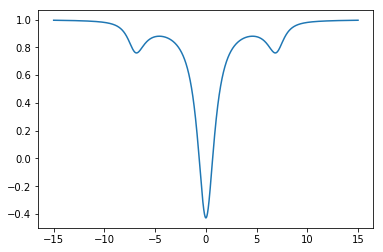

In [33]:
#ONE-TONE EXPERIMENT
#freqs in units of kappa ext
eta = 1 #cavity coupling efficiency k0/kext

g0 = 1e2/1e5 #vacuum coupling rate
ncav = 1e5 #number of intracavity photons
g = g0*ncav

Omega_m = 7 #mechanical frequency
kB = 1e-23
T = 300
hbar = 1e-34
#Q = 1e2 #quality factor
#Gamma = Omega_m/Q
nth = (kB*T)/(hbar*Omega_m*1e5)

omegas = np.arange(-15, 15, 0.01) #in units of kappa, probe frequency

denom_opt = omegas*omegas + (1+eta)**2/4
denom_omp = (omegas+Omega_m)**2 + (1+eta)**2/4
denom_omm = (omegas-Omega_m)**2 + (1+eta)**2/4
R_aa_1 = -(1+eta)/denom_opt #reduction in R from optics
R_aa_2 = 1/denom_opt
R_ba = nth*(g0/2)**2*(1/denom_omp + 1/denom_omm)
R = 1 + R_aa_1 + R_aa_2*(1 - R_ba)

plot(omegas, R)
#ylim(0, 1.01)

In [ ]:
#TWO-TONE EXPERIMENT
g0 = 0 #vacuum coupling rate
ncav = 1e5 #number of intracavity photons
g = g0*ncav

omega_cav = 1e9 #cavity resonance
kappa = 1e6 #cavity bandwidth


Omega_m = 1e7 #mechanical frequency
Q = 1e6 #quality factor
Gamma = 0#Omega_m/Q

omega = np.arange(-5, 5, 0.1) #in units of kappa, probe frequency
Omega = -Omega_m #control tone frequency

chi_aa = 1/((1/2)+1j*omega) #+ g*g/(kappa*Gamma/2 + 1j*kappa*(Omega_m+omega-Omega)))
T = np.abs(1 - chi_aa)**2

fig = plot(omega, T)

In [ ]:
Omeg = 1e5
kappa = 1

omegs = 